<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/xgboost_fullstack_trading_pipeline_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-9' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,758 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/restricted amd64 Packages [4,948 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all P

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 38.9 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [9]:
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance --quiet
!pip install stable-baselines3[extra] --quiet


In [10]:
# === Imports ===
import os
import time
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.decomposition import PCA  # <-- Added for noise filtering

# === Config ===
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]
CONFIG = {
    'period': '729d',
    'interval': '1h'
}

# === Download Function ===
def download_stock_data(ticker, period="729d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker} (period={period}, interval={interval})...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

# === Feature Engineering Function ===
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    df['CCI'] = ((df['Close'] - df['Close'].rolling(20).mean()) / (0.015 * df['Close'].rolling(20).std()))
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    df['RSI'] = 100 - (100 / (1 + df['Close'].diff().where(lambda x: x > 0, 0).rolling(14).mean() /
                               -df['Close'].diff().where(lambda x: x < 0, 0).rolling(14).mean()))

    # === Contextual Features ===
    df['Volume_SMA_20'] = df['Volume'].rolling(20).mean()
    df['Volume_Spike'] = (df['Volume'] > 1.5 * df['Volume_SMA_20']).astype(int)
    df['RSI_Overbought'] = (df['RSI'] > 70).astype(int)
    df['RSI_Oversold'] = (df['RSI'] < 30).astype(int)
    df['ADX'] = abs(df['High'] - df['Low']).rolling(14).mean()
    df['Volatility'] = df['Close'].pct_change().rolling(20).std()
    df['Regime'] = np.where(df['Volatility'] < 0.01, 'Bull',
                            np.where(df['Volatility'] > 0.03, 'Bear', 'Sideways'))
    regime_dummies = pd.get_dummies(df['Regime'], prefix='Regime')
    for col in ['Regime_Bull', 'Regime_Bear', 'Regime_Sideways']:
        if col not in regime_dummies.columns:
            regime_dummies[col] = 0
    regime_dummies = regime_dummies.astype(int)
    df = pd.concat([df, regime_dummies], axis=1)

    # === Target ===
    df['Future_Close'] = df['Close'].shift(-10)
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_localize(None)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # === Noise Filtering via PCA ===
    features_to_filter = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch',
                          'Volume_Spike', 'RSI_Overbought', 'RSI_Oversold', 'ADX']
    df_features = df[features_to_filter].dropna()
    if not df_features.empty:
        pca = PCA(n_components=0.95)
        pca_values = pca.fit_transform(df_features)
        pca_columns = [f"PCA_{i+1}" for i in range(pca_values.shape[1])]
        df_pca = pd.DataFrame(pca_values, columns=pca_columns, index=df_features.index)
        df = pd.concat([df, df_pca], axis=1)

    return df

# === Download & Feature Loop ===
all_dfs = []
for ticker in ticker_list:
    df_raw = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_raw is not None:
        try:
            raw_len = len(df_raw)
            df_feat = compute_enhanced_features(df_raw)
            feat_len = len(df_feat.dropna())
            min_date = df_feat['Datetime'].min() if not df_feat.empty else "NA"
            max_date = df_feat['Datetime'].max() if not df_feat.empty else "NA"
            print(f"✅ {ticker}: Raw = {raw_len}, After features = {feat_len}, Range = {min_date} to {max_date}")
            all_dfs.append(df_feat)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Skipping {ticker}: download failed")

# === Combine & Save ===
if all_dfs:
    df_all = pd.concat(all_dfs, ignore_index=True)
    print(f"\nFinal combined dataset shape: {df_all.shape}")

    df_all.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally: multi_stock_feature_engineered_dataset.csv")

    grouped = df_all.groupby("Symbol")
    for symbol, df_ticker in grouped:
        start_date = df_ticker['Datetime'].min().date()
        end_date = df_ticker['Datetime'].max().date()
        print(f"{symbol} walkforward window: {start_date} to {end_date}")


Attempt 1: Downloading AAPL (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


✅ AAPL: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading TSLA (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ TSLA: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading MSFT (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ MSFT: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading GOOGL (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed


✅ GOOGL: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading AMZN (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ AMZN: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading NVDA (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ NVDA: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading META (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ META: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading BRK-B (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ BRK-B: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading JPM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ JPM: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading JNJ (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ JNJ: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading XOM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed


✅ XOM: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading V (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


✅ V: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading PG (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


✅ PG: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading UNH (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed


✅ UNH: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading MA (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ MA: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading HD (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ HD: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading LLY (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ LLY: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading MRK (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ MRK: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading PEP (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ PEP: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading KO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ KO: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading BAC (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ BAC: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading ABBV (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ ABBV: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading AVGO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ AVGO: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading PFE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ PFE: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading COST (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ COST: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading CSCO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ CSCO: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading TMO (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ TMO: Raw = 5066, After features = 5036, Range = 2022-08-12 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading ABT (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ ABT: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading ACN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ ACN: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading WMT (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ WMT: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading MCD (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ MCD: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading ADBE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ ADBE: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading DHR (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed


✅ DHR: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading CRM (period=729d, interval=1h)...


/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ CRM: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading NKE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ NKE: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading INTC (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ INTC: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading QCOM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ QCOM: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading NEE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ NEE: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading AMD (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ AMD: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading TXN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ TXN: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading AMGN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ AMGN: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading UPS (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ UPS: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading LIN (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ LIN: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading PM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ PM: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading UNP (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ UNP: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading BMY (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ BMY: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading LOW (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ LOW: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading RTX (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ RTX: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading CVX (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ CVX: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading IBM (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ IBM: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading GE (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ GE: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading SBUX (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-10-1197252207.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval)


✅ SBUX: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00
Attempt 1: Downloading ORCL (period=729d, interval=1h)...


[*********************100%***********************]  1 of 1 completed


✅ ORCL: Raw = 5073, After features = 5043, Range = 2022-08-11 13:30:00 to 2025-07-09 17:30:00

Final combined dataset shape: (268862, 36)
Saved locally: multi_stock_feature_engineered_dataset.csv
AAPL walkforward window: 2022-08-11 to 2025-07-09
ABBV walkforward window: 2022-08-11 to 2025-07-09
ABT walkforward window: 2022-08-11 to 2025-07-09
ACN walkforward window: 2022-08-11 to 2025-07-09
ADBE walkforward window: 2022-08-11 to 2025-07-09
AMD walkforward window: 2022-08-11 to 2025-07-09
AMGN walkforward window: 2022-08-11 to 2025-07-09
AMZN walkforward window: 2022-08-11 to 2025-07-09
AVGO walkforward window: 2022-08-11 to 2025-07-09
BAC walkforward window: 2022-08-11 to 2025-07-09
BMY walkforward window: 2022-08-11 to 2025-07-09
BRK-B walkforward window: 2022-08-11 to 2025-07-09
COST walkforward window: 2022-08-11 to 2025-07-09
CRM walkforward window: 2022-08-11 to 2025-07-09
CSCO walkforward window: 2022-08-11 to 2025-07-09
CVX walkforward window: 2022-08-11 to 2025-07-09
DHR walkfo

In [ ]:
!rm -rf /content/drive

In [11]:
# === Imports ===
import os, gc, json, joblib, random, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
import shap
from sklearn.model_selection import ParameterGrid
from google.colab import drive

# === Mount Google Drive ===
drive.mount("/content/drive", force_remount=True)

# === Config ===
SAVE_DIR = "/content/drive/MyDrive/QuantConnect/results_lightgbm/xgb_walkforward_results"
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
FINAL_MODEL_DIR = f"{RESULTS_DIR}/models"
os.makedirs(f"{RESULTS_DIR}/plots", exist_ok=True)
os.makedirs(f"{RESULTS_DIR}/data", exist_ok=True)
os.makedirs(FINAL_MODEL_DIR, exist_ok=True)

# === Load Data ===
df = pd.read_csv("multi_stock_feature_engineered_dataset.csv", low_memory=False)
df['Datetime'] = pd.to_datetime(df['Datetime']).dt.tz_localize(None)

# === Add Market Regime Features (if missing) ===
if 'Regime_Bull' not in df.columns:
    df['Volatility'] = df['Close'].pct_change().rolling(20).std()
    df['Regime'] = np.where(df['Volatility'] < 0.01, 'Bull',
                            np.where(df['Volatility'] > 0.03, 'Bear', 'Sideways'))
    regime_dummies = pd.get_dummies(df['Regime'], prefix='Regime')
    for col in ['Regime_Bull', 'Regime_Bear', 'Regime_Sideways']:
        if col not in regime_dummies.columns:
            regime_dummies[col] = 0
    df = pd.concat([df, regime_dummies.astype(int)], axis=1)

# === Ensure Target is clean ===
df = df[df['Target'].isin([-1, 0, 1])]

# === Volatility Clustering Features ===
df['Hurst'] = df['Close'].rolling(100).apply(lambda x: np.log(np.std(np.diff(x))) if len(x.dropna()) > 1 else np.nan)
df['ATR'] = df['High'].combine(df['Close'].shift(), max) - df['Low'].combine(df['Close'].shift(), min)
df['ATR_Slope'] = df['ATR'].diff()

# === Features & Labels ===
features = [
    'SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch',
    'Regime_Bull', 'Regime_Bear', 'Regime_Sideways',
    'Volume_Spike', 'RSI_Overbought', 'RSI_Oversold', 'ADX',
    'Hurst', 'ATR', 'ATR_Slope'
]
target = "Target"
label_map = {0: 0, 1: 1, -1: 2}
results = []

# === Hyperparameter Grid ===
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 5]
}

# === Tickers ===
test_mode = False
TICKERS = ['AAPL'] if test_mode else [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]
simulate_latency = True

# === Date Window Generator ===
def generate_date_windows(start_date, end_date, train_days=365, test_days=60, step_days=60):
    windows = []
    current = pd.to_datetime(start_date)
    while current + timedelta(days=train_days + test_days) <= pd.to_datetime(end_date):
        train_start = current
        train_end = train_start + timedelta(days=train_days)
        test_start = train_end
        test_end = test_start + timedelta(days=test_days)
        windows.append((train_start, train_end, test_start, test_end))
        current += timedelta(days=step_days)
    return windows

# === Walkforward Training Function ===
def walkforward_xgb(df_ticker, ticker):
    if target not in df_ticker.columns:
        print(f"⚠️ Target column missing in {ticker}, skipping.")
        return

    df_ticker['Target_Mapped'] = df_ticker[target].map(label_map)
    start_date = df_ticker['Datetime'].min().date()
    end_date = df_ticker['Datetime'].max().date()
    windows = generate_date_windows(start_date, end_date)

    for (train_start, train_end, test_start, test_end) in windows:
        train_df = df_ticker[(df_ticker['Datetime'] >= train_start) & (df_ticker['Datetime'] < train_end)].dropna()
        test_df = df_ticker[(df_ticker['Datetime'] >= test_start) & (df_ticker['Datetime'] < test_end)].dropna()

        if len(train_df) < 200 or len(test_df) < 50:
            continue

        X_train, y_train = train_df[features].astype(float), train_df['Target_Mapped']
        X_test, y_test = test_df[features].astype(float), test_df['Target_Mapped']

        best_score = -np.inf
        best_model, best_preds, best_proba = None, None, None
        grid_results = []

        for params in ParameterGrid(param_grid):
            class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
            sample_weights = y_train.map(dict(zip(np.unique(y_train), class_weights)))

            model = XGBClassifier(**params, tree_method='hist', random_state=42)
            model.fit(X_train, y_train, sample_weight=sample_weights)

            proba = model.predict_proba(X_test)
            preds = np.argmax(proba, axis=1)
            acc = accuracy_score(y_test, preds)
            returns = pd.Series(np.max(proba, axis=1)).pct_change().fillna(0)
            sharpe = (returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252)

            print(f"Params: {params} | Acc: {acc:.4f} | Sharpe: {sharpe:.2f}")

            grid_results.append({
                "Params": params,
                "Accuracy": round(acc, 4),
                "Sharpe": round(sharpe, 3)
            })

            if sharpe > best_score:
                best_score = sharpe
                best_model, best_preds, best_proba = model, preds, proba

        # === Save Grid Search Results ===
        grid_df = pd.DataFrame(grid_results)
        grid_df['Train_Start'] = train_start
        grid_df['Test_Start'] = test_start
        grid_df['Ticker'] = ticker
        grid_path = os.path.join(RESULTS_DIR, "data", f"{ticker}_{train_start}_{test_start}_grid_results.csv")
        grid_df.to_csv(grid_path, index=False)

        if best_model is None:
            continue

        # SHAP Visualization
        explainer = shap.Explainer(best_model)
        shap_values = explainer(X_test)
        shap.summary_plot(shap_values, X_test, show=False)
        shap_plot_path = os.path.join(RESULTS_DIR, "plots", f"shap_{ticker}_{train_start}_{test_start}.png")
        plt.tight_layout()
        plt.savefig(shap_plot_path)
        plt.close()

        signal = best_preds - 1
        confidence_threshold = 0.5
        conf_scores = best_proba.max(axis=1)
        signal[(conf_scores < confidence_threshold)] = 0

        test_df['Signal'] = signal
        test_df['Rolling_Mean_50'] = test_df['Close'].rolling(50).mean()

        capital, shares, portfolio, last_trade_idx = 100000, 0, [], -10
        cooldown, slippage_pct, sl_ratio = 5, 0.001, 0.02

        for i, row in test_df.iterrows():
            price, sig = row['Close'], row['Signal']
            adx = row.get('ADX', 10)
            sma = row.get('Rolling_Mean_50', price)

            if simulate_latency:
                time.sleep(random.uniform(0.05, 0.2))

            if sig == 1 and (i - last_trade_idx > cooldown) and price > sma and adx > 1.2:
                risk = 0.02 * capital
                stop = price * (1 - sl_ratio)
                risk_per_share = price - stop
                qty = min((risk // risk_per_share), (capital * 0.1) // price)
                buy_price = price * (1 + slippage_pct)
                if qty > 0:
                    capital -= qty * buy_price
                    shares += qty
                    last_trade_idx = i

            elif sig == -1 and shares > 0 and (i - last_trade_idx > cooldown):
                sell_price = price * (1 - slippage_pct)
                capital += shares * sell_price
                shares = 0
                last_trade_idx = i

            portfolio.append(capital + shares * price)

        if not portfolio or np.std(portfolio) == 0:
            continue

        final_value = portfolio[-1]
        return_pct = (final_value - 100000) / 100000 * 100
        returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252)
        drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100

        results.append({
            "Ticker": ticker,
            "Train Period": f"{train_start} to {train_end}",
            "Test Period": f"{test_start} to {test_end}",
            "Model": "XGBoost",
            "Accuracy": round(accuracy_score(y_test, best_preds), 4),
            "Sharpe": round(sharpe, 3),
            "Drawdown": round(drawdown, 2),
            "Return": round(return_pct, 2),
            "Final_Portfolio": round(final_value, 2)
        })

        prefix = f"{ticker}_{train_start}_{test_start}"
        joblib.dump(best_model, os.path.join(FINAL_MODEL_DIR, f"xgb_{prefix}.pkl"))
        with open(os.path.join(FINAL_MODEL_DIR, f"xgb_{prefix}_features.json"), "w") as f:
            json.dump(features, f)
        test_df.to_csv(os.path.join(RESULTS_DIR, "data", f"{prefix}_result.csv"), index=False)

# === Skip already processed tickers ===
completed_tickers = set()
results_path = os.path.join(RESULTS_DIR, "xgb_walkforward_metrics.csv")
if os.path.exists(results_path):
    try:
        completed_df = pd.read_csv(results_path)
        completed_tickers = set(completed_df['Ticker'].unique())
    except Exception as e:
        print(f"⚠️ Failed to read existing results: {e}")

for ticker in TICKERS:
    if ticker in completed_tickers:
        print(f"✅ Skipping {ticker} — already processed.")
        continue

    df_ticker = df[df['Symbol'] == ticker].copy()
    if len(df_ticker) < 1000:
        continue

    print(f"🚀 Processing {ticker}")
    walkforward_xgb(df_ticker, ticker)
    gc.collect()


# === Save Final Summary ===
summary_df = pd.DataFrame(results)
summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_walkforward_metrics.csv"), index=False)

if all(x in summary_df.columns for x in ['Sharpe', 'Return', 'Final_Portfolio']):
    summary_df['score'] = (
        summary_df['Sharpe'] * 0.4 +
        summary_df['Return'] * 0.3 +
        summary_df['Final_Portfolio'] * 0.3
    )
    summary_df.to_csv(os.path.join(RESULTS_DIR, "xgb_model_selector_metrics.csv"), index=False)
    best_models = summary_df.sort_values(['Ticker', 'score'], ascending=[True, False])\
                            .groupby('Ticker').first().reset_index()
    best_models.to_excel(os.path.join(RESULTS_DIR, "xgb_best_models_by_score.xlsx"), index=False)
else:
    print("⚠️ Skipping score calculation — missing required metrics columns.")


Mounted at /content/drive
🚀 Processing AAPL
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} | Acc: 0.7666 | Sharpe: 0.57
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200} | Acc: 0.7666 | Sharpe: 0.58
Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100} | Acc: 0.7596 | Sharpe: 0.57
Params: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200} | Acc: 0.7596 | Sharpe: 0.64
Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} | Acc: 0.7666 | Sharpe: 0.70
Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200} | Acc: 0.7666 | Sharpe: 0.69
Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100} | Acc: 0.7666 | Sharpe: 0.67
Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200} | Acc: 0.7631 | Sharpe: 0.65
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100} | Acc: 0.6128 | Sharpe: 0.64
Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200} | Acc

📊 Portfolio Summary (Starting Capital = $100,000):
- Count: 193
- Mean Final Portfolio: $100,064.05
- Median Final Portfolio: $99,939.88
- Max Final Portfolio: $111,932.49
- Min Final Portfolio: $90,486.87
- Std Dev: $1,776.21


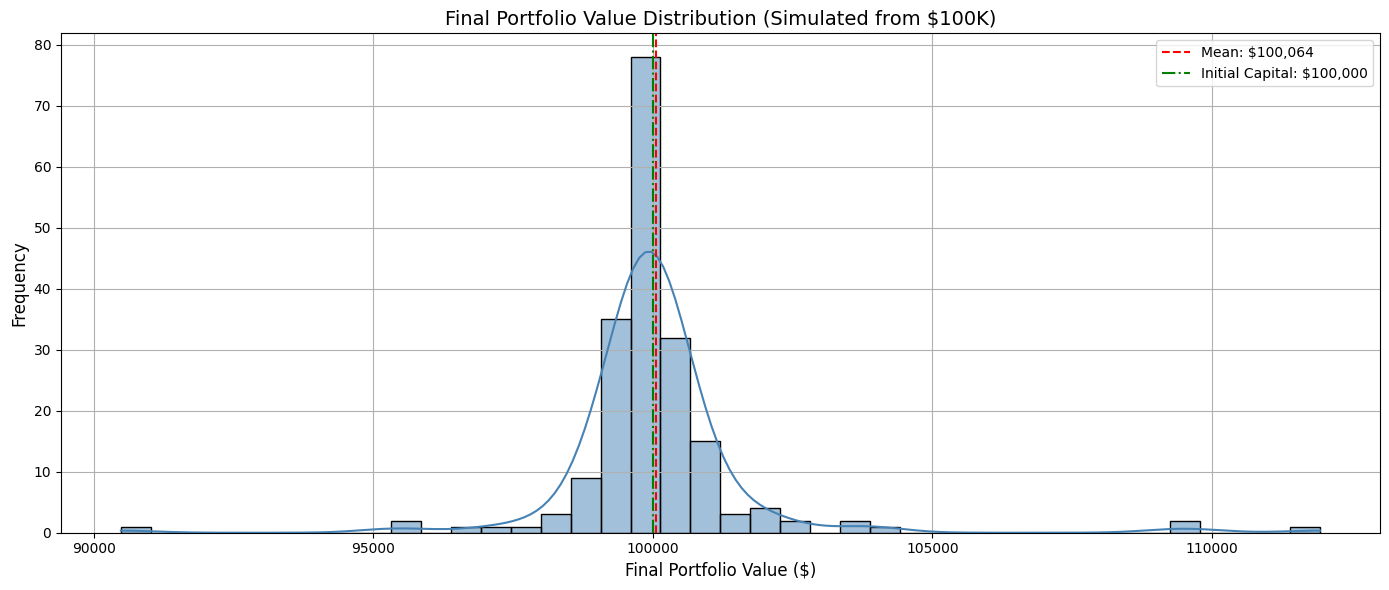


🏆 Top 5 Best Windows by Final Portfolio Value:
    Ticker                                 Test Period  Final_Portfolio  \
80    AVGO  2025-04-02 00:00:00 to 2025-06-01 00:00:00        111932.49   
131    AMD  2023-12-09 00:00:00 to 2024-02-07 00:00:00        109713.73   
185     GE  2025-04-02 00:00:00 to 2025-06-01 00:00:00        109282.99   
67      HD  2024-08-05 00:00:00 to 2024-10-04 00:00:00        104035.35   
10    TSLA  2024-10-04 00:00:00 to 2024-12-03 00:00:00        103740.15   

     Sharpe  Return  Drawdown  
80    1.697   11.93      2.70  
131   1.188    9.71      3.86  
185   2.395    9.28      1.56  
67    1.663    4.04      0.59  
10    0.730    3.74      2.81  

⚠️ Bottom 5 Worst Windows by Final Portfolio Value:
   Ticker                                 Test Period  Final_Portfolio  \
27   NVDA  2024-06-06 00:00:00 to 2024-08-05 00:00:00         90486.87   
78   AVGO  2024-12-03 00:00:00 to 2025-02-01 00:00:00         95319.95   
6    TSLA  2024-02-07 00:00:00 to 

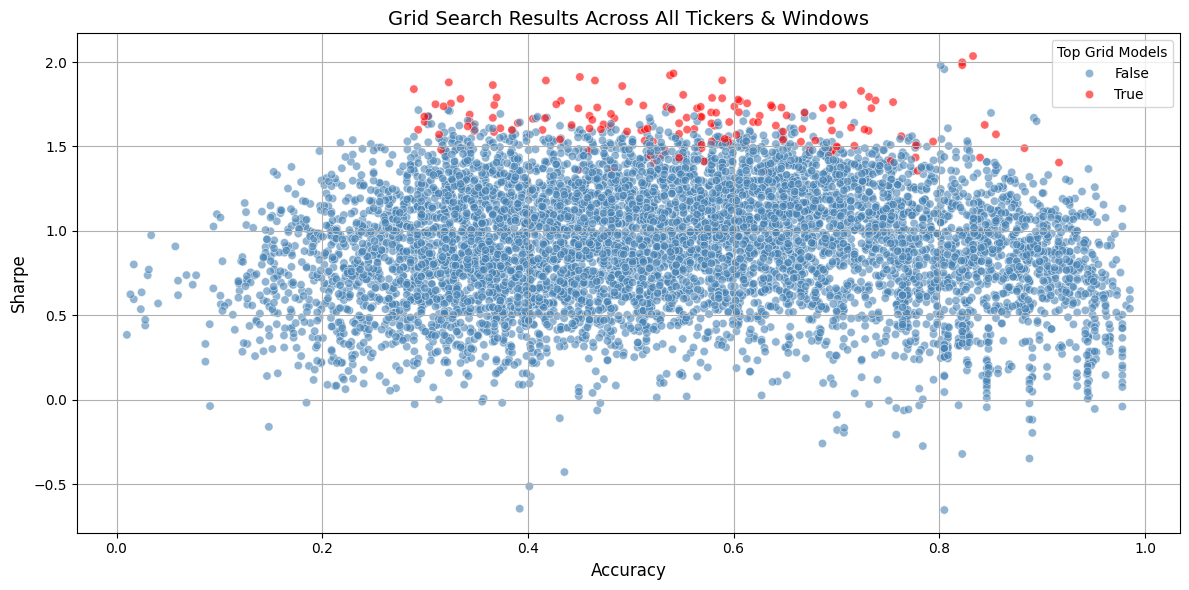

In [12]:
# === Imports ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# === Config ===
RESULTS_DIR = "/content/drive/MyDrive/QuantConnect/results_xgb_walkforward_results"
SUMMARY_CSV = os.path.join(RESULTS_DIR, "xgb_walkforward_metrics.csv")

# === Load Final Evaluation Results ===
df = pd.read_csv(SUMMARY_CSV)

# === Portfolio Summary Stats ===
mean_final = df["Final_Portfolio"].mean()
median_final = df["Final_Portfolio"].median()
max_final = df["Final_Portfolio"].max()
min_final = df["Final_Portfolio"].min()
std_final = df["Final_Portfolio"].std()
count = len(df)

print(f"📊 Portfolio Summary (Starting Capital = $100,000):")
print(f"- Count: {count}")
print(f"- Mean Final Portfolio: ${mean_final:,.2f}")
print(f"- Median Final Portfolio: ${median_final:,.2f}")
print(f"- Max Final Portfolio: ${max_final:,.2f}")
print(f"- Min Final Portfolio: ${min_final:,.2f}")
print(f"- Std Dev: ${std_final:,.2f}")

# === Portfolio Histogram ===
plt.figure(figsize=(14, 6))
sns.histplot(df["Final_Portfolio"], kde=True, bins=40, color='steelblue')
plt.axvline(mean_final, color='red', linestyle='--', label=f'Mean: ${mean_final:,.0f}')
plt.axvline(100000, color='green', linestyle='-.', label='Initial Capital: $100,000')
plt.title("Final Portfolio Value Distribution (Simulated from $100K)", fontsize=14)
plt.xlabel("Final Portfolio Value ($)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(RESULTS_DIR, "simulated_final_portfolio_distribution.png"))
plt.show()

# === Top and Bottom Performing Windows ===
top5 = df.sort_values(by="Final_Portfolio", ascending=False).head(5)
bottom5 = df.sort_values(by="Final_Portfolio", ascending=True).head(5)

print("\n🏆 Top 5 Best Windows by Final Portfolio Value:")
print(top5[["Ticker", "Test Period", "Final_Portfolio", "Sharpe", "Return", "Drawdown"]])

print("\n⚠️ Bottom 5 Worst Windows by Final Portfolio Value:")
print(bottom5[["Ticker", "Test Period", "Final_Portfolio", "Sharpe", "Return", "Drawdown"]])

# === Load and Combine Grid Search Results ===
csv_files = glob.glob(os.path.join(RESULTS_DIR, "data", "*_grid_results.csv"))
if csv_files:
    all_grids = [pd.read_csv(f) for f in csv_files]
    combined_grid = pd.concat(all_grids, ignore_index=True)

    # Optional: Identify Top Grid Models by Sharpe
    top_grid = combined_grid.sort_values("Sharpe", ascending=False).groupby("Ticker").head(3)
    combined_grid["Top Grid Models"] = combined_grid.index.isin(top_grid.index)

    # === Grid Search Accuracy vs. Sharpe Plot ===
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=combined_grid, x="Accuracy", y="Sharpe", hue="Top Grid Models", palette={True: "red", False: "steelblue"}, alpha=0.6)
    plt.title("Grid Search Results Across All Tickers & Windows", fontsize=14)
    plt.xlabel("Accuracy", fontsize=12)
    plt.ylabel("Sharpe", fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(RESULTS_DIR, "gridsearch_summary.png"))
    plt.show()
else:
    print("⚠️ No grid search CSVs found in data folder.")
